# Downloading the data

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2017-02-01'

# Tickers of assets
assets = [
    "ABCB4.SA", "ALUP11.SA", "B3SA3.SA", "BRSR6.SA", "BBSE3.SA", "BRAP4.SA", "BBAS3.SA", "AGRO3.SA", "CMIG3.SA",
    "CMIG4.SA", "CSMG3.SA", "CPLE6.SA", "CPFE3.SA", "CMIN3.SA", "CURY3.SA", "DIRR3.SA", "ENAT3.SA", "EGIE3.SA",
    "FESA4.SA", "GGBR4.SA", "GOAU4.SA", "MYPK3.SA", "RANI3.SA", "ITSA4.SA", "JBSS3.SA", "JHSF3.SA", "KEPL3.SA",
    "LAVV3.SA", "MRFG3.SA", "BEEF3.SA", "PETR3.SA", "PETR4.SA", "PSSA3.SA", "RAPT4.SA", "ROMI3.SA", "SANB11.SA",
    "CSNA3.SA", "TAEE11.SA", "VIVT3.SA", "TRPL4.SA", "TRIS3.SA", "UNIP6.SA", "USIM5.SA", "VALE3.SA", "VBBR3.SA"
]
assets.sort()

# Downloading data
data = yf.download(assets, start = start)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%***********************]  45 of 45 completed


In [2]:
Y = data[assets].pct_change().dropna()

display(Y.head())

,ABCB4.SA,AGRO3.SA,ALUP11.SA,B3SA3.SA,BBAS3.SA,BBSE3.SA,BEEF3.SA,BRAP4.SA,BRSR6.SA,CMIG3.SA,...,ROMI3.SA,SANB11.SA,TAEE11.SA,TRIS3.SA,TRPL4.SA,UNIP6.SA,USIM5.SA,VALE3.SA,VBBR3.SA,VIVT3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2021-02-23,3.7383%,0.6593%,-1.2048%,-0.7176%,7.1700%,0.9406%,3.4216%,1.3417%,4.7238%,1.1564%,...,-2.2053%,4.0582%,0.0639%,1.7000%,6.1233%,1.8796%,5.0033%,1.6780%,0.3301%,-0.7699%
2021-02-24,2.6383%,1.3537%,0.2439%,0.5060%,-0.3944%,-1.0809%,4.3757%,3.0685%,0.7645%,1.5467%,...,13.7636%,-3.3113%,0.3512%,-1.0816%,2.1053%,0.4100%,9.5299%,1.0108%,-0.8459%,-1.5961%
2021-02-25,0.1881%,-2.5420%,-1.7032%,-1.3125%,-2.8043%,-2.2231%,-4.0900%,-3.7479%,-2.6555%,-4.4371%,...,-3.2809%,-2.5114%,-1.9408%,-1.4911%,-1.5273%,1.8746%,-4.3504%,-2.2669%,-3.2701%,0.2929%
2021-02-26,-3.8798%,-2.6967%,-2.6815%,-1.0749%,-4.7862%,-2.0039%,3.4115%,-1.3032%,-1.4809%,1.2474%,...,-5.3004%,-2.1077%,-0.1947%,-5.5499%,-4.3382%,3.4615%,-1.5161%,-1.2433%,-2.4008%,-1.1680%
2021-03-01,1.2370%,2.5897%,-0.4239%,0.0921%,-0.6774%,-2.4774%,-0.5154%,2.7362%,-5.2215%,-4.4490%,...,5.7836%,-0.9569%,-1.1379%,-1.9231%,-1.5899%,-4.8424%,3.7562%,4.2848%,-1.1546%,-1.3689%


# Estimating Mean Variance Portfolios

### Calculating the portfolio that maximizes Sharpe ratio

In [3]:
import riskfolio as rp

# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,ABCB4.SA,AGRO3.SA,ALUP11.SA,B3SA3.SA,BBAS3.SA,BBSE3.SA,BEEF3.SA,BRAP4.SA,BRSR6.SA,CMIG3.SA,...,ROMI3.SA,SANB11.SA,TAEE11.SA,TRIS3.SA,TRPL4.SA,UNIP6.SA,USIM5.SA,VALE3.SA,VBBR3.SA,VIVT3.SA
weights,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,3.0265%,0.0000%,0.0000%,20.5202%,...,0.0000%,0.0000%,6.1870%,0.0000%,0.0000%,2.9384%,0.0000%,0.0000%,0.0000%,0.0000%


### Plotting portfolio composition

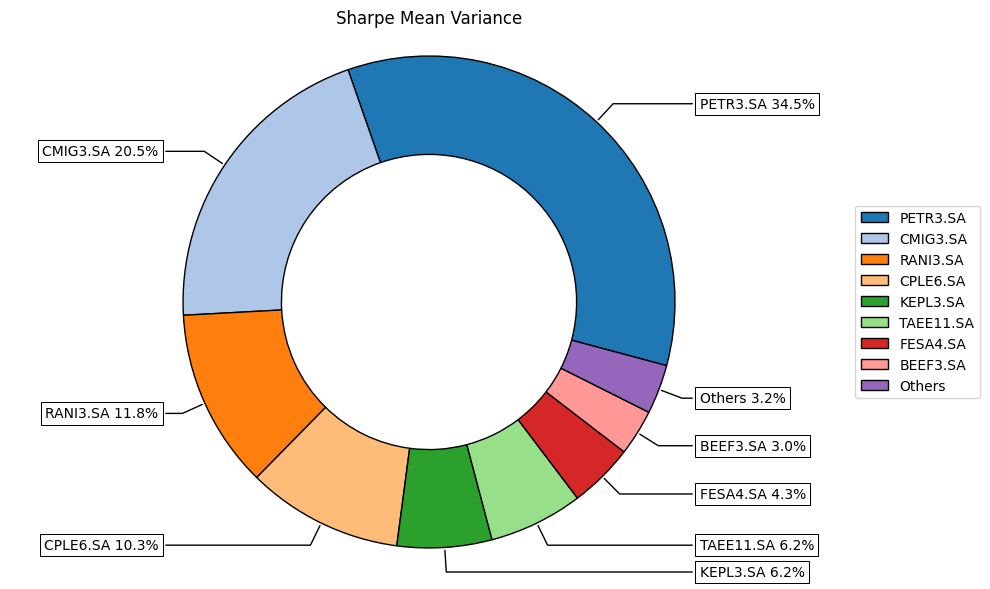

In [4]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

### Calculate efficient frontier

In [5]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,ABCB4.SA,AGRO3.SA,ALUP11.SA,B3SA3.SA,BBAS3.SA,BBSE3.SA,BEEF3.SA,BRAP4.SA,BRSR6.SA,CMIG3.SA,...,ROMI3.SA,SANB11.SA,TAEE11.SA,TRIS3.SA,TRPL4.SA,UNIP6.SA,USIM5.SA,VALE3.SA,VBBR3.SA,VIVT3.SA
0,0.6328%,0.0000%,5.5613%,0.0000%,0.0000%,7.9671%,0.4596%,1.6786%,0.0000%,0.0000%,...,0.0000%,0.0000%,12.7480%,0.0000%,15.9947%,0.3413%,0.0000%,10.2007%,0.0000%,14.3553%
1,0.6044%,0.0000%,4.6150%,0.0000%,0.0000%,7.9551%,2.0004%,0.0000%,0.0000%,0.0000%,...,0.0000%,0.0000%,15.3928%,0.0000%,14.0940%,1.5589%,0.0000%,5.8441%,0.0000%,11.6011%
2,0.4334%,0.0000%,4.0537%,0.0000%,0.0000%,8.0445%,2.5914%,0.0000%,0.0000%,1.6591%,...,0.0000%,0.0000%,16.5361%,0.0000%,12.4141%,1.8092%,0.0000%,3.9854%,0.0000%,10.3051%
3,0.2850%,0.0000%,3.6049%,0.0000%,0.0000%,8.1141%,3.0643%,0.0000%,0.0000%,3.1995%,...,0.0000%,0.0000%,17.4848%,0.0000%,11.0231%,2.0007%,0.0000%,2.4842%,0.0000%,9.2579%
4,0.1272%,0.0000%,3.2752%,0.0000%,0.0000%,8.1101%,3.4032%,0.0000%,0.0000%,4.5569%,...,0.0000%,0.0000%,18.3333%,0.0000%,9.7856%,2.1724%,0.0000%,0.8405%,0.0000%,8.3552%


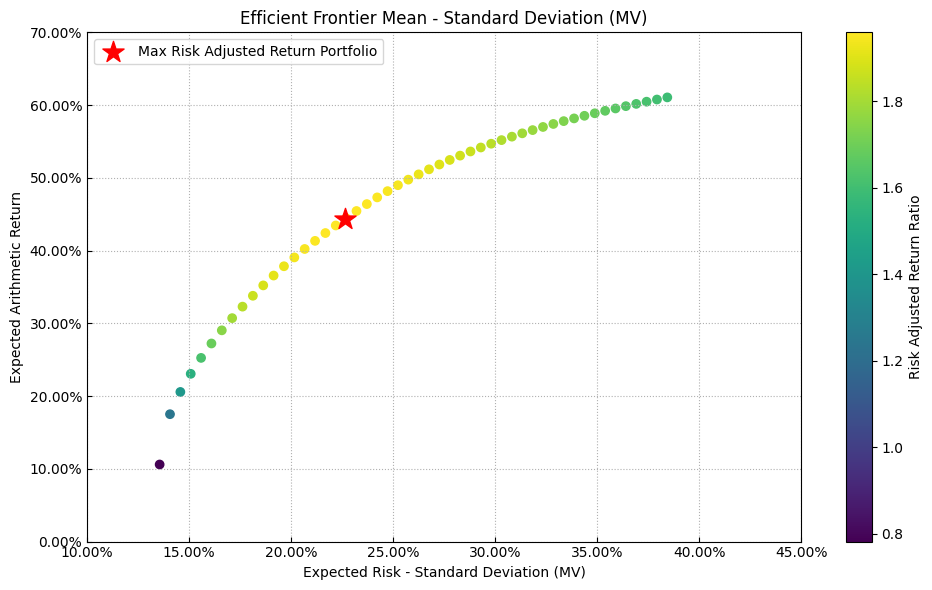

In [6]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

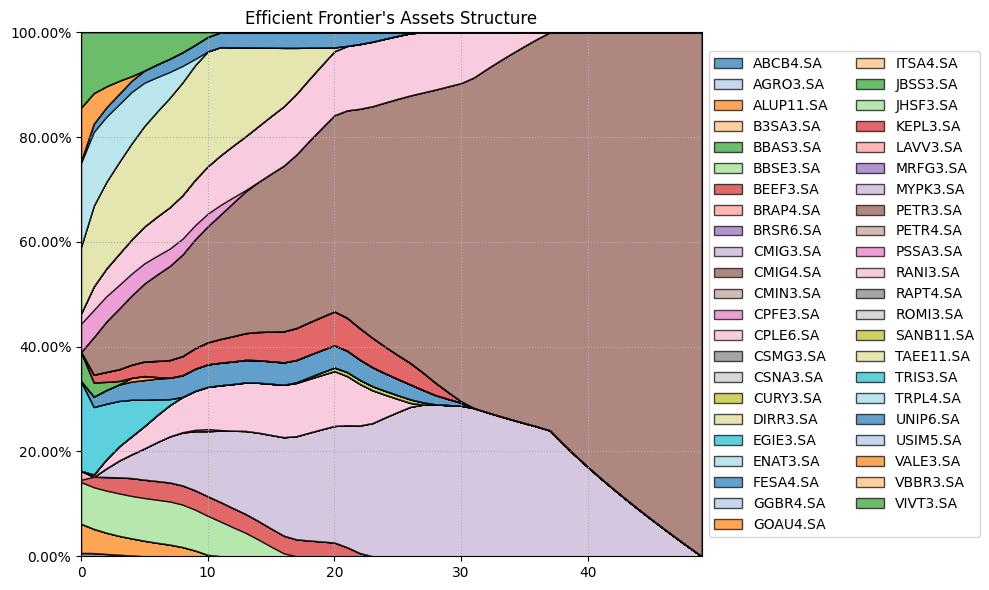

In [7]:
# Plotting efficient frontier composition

ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

# Estimating Mean Risk Portfolios (Other tests)

### Calculating the portfolio that maximizes Return/CVaR ratio.

In [8]:
rm = 'CVaR' # Risk measure

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,ABCB4.SA,AGRO3.SA,ALUP11.SA,B3SA3.SA,BBAS3.SA,BBSE3.SA,BEEF3.SA,BRAP4.SA,BRSR6.SA,CMIG3.SA,...,ROMI3.SA,SANB11.SA,TAEE11.SA,TRIS3.SA,TRPL4.SA,UNIP6.SA,USIM5.SA,VALE3.SA,VBBR3.SA,VIVT3.SA
weights,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,1.3472%,0.0000%,0.0000%,14.0188%,...,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,5.3714%,0.0000%,0.0000%,0.0000%,0.0000%


# Plotting portfolio composition

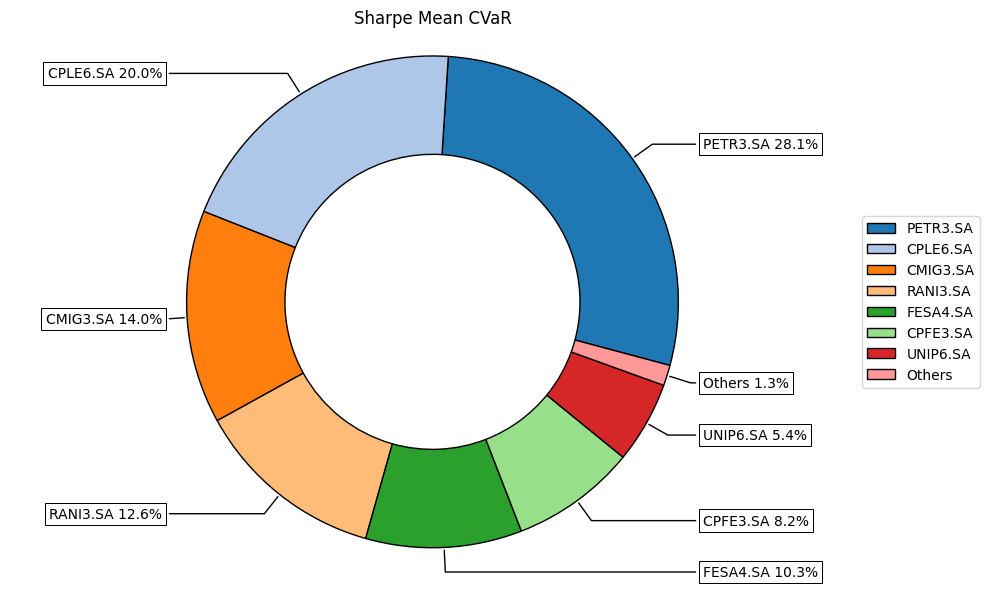

In [9]:
ax = rp.plot_pie(w=w, title='Sharpe Mean CVaR', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

### Calculate efficient frontier

In [10]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,ABCB4.SA,AGRO3.SA,ALUP11.SA,B3SA3.SA,BBAS3.SA,BBSE3.SA,BEEF3.SA,BRAP4.SA,BRSR6.SA,CMIG3.SA,...,ROMI3.SA,SANB11.SA,TAEE11.SA,TRIS3.SA,TRPL4.SA,UNIP6.SA,USIM5.SA,VALE3.SA,VBBR3.SA,VIVT3.SA
0,0.0000%,0.0000%,3.9932%,0.0000%,0.0000%,3.5634%,0.5727%,0.0000%,0.0000%,0.0000%,...,0.0000%,0.0000%,10.9594%,0.0000%,15.7332%,0.0000%,0.0000%,12.6788%,0.0000%,11.9569%
1,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,6.2436%,2.2122%,0.0000%,0.0000%,0.4644%,...,0.0000%,0.0000%,18.6841%,0.0000%,9.3138%,0.0000%,0.0000%,9.4335%,0.0000%,6.1668%
2,0.0000%,2.2854%,0.0000%,0.0000%,0.0000%,9.5046%,0.2191%,0.0000%,0.0000%,1.5284%,...,0.0000%,0.0000%,19.9797%,0.0000%,8.7461%,0.0000%,0.0000%,7.7048%,0.0000%,2.0614%
3,0.0000%,1.0591%,0.0000%,0.0000%,0.0000%,11.2047%,0.3218%,0.0000%,0.0000%,1.4489%,...,0.0000%,0.0000%,22.0820%,0.0000%,7.8159%,2.1716%,0.0000%,5.6853%,0.0000%,4.6322%
4,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,10.8681%,1.0559%,0.0000%,0.0000%,3.0517%,...,0.0000%,0.0000%,27.3063%,0.0000%,8.8104%,4.7179%,0.0000%,4.1336%,0.0000%,3.9672%


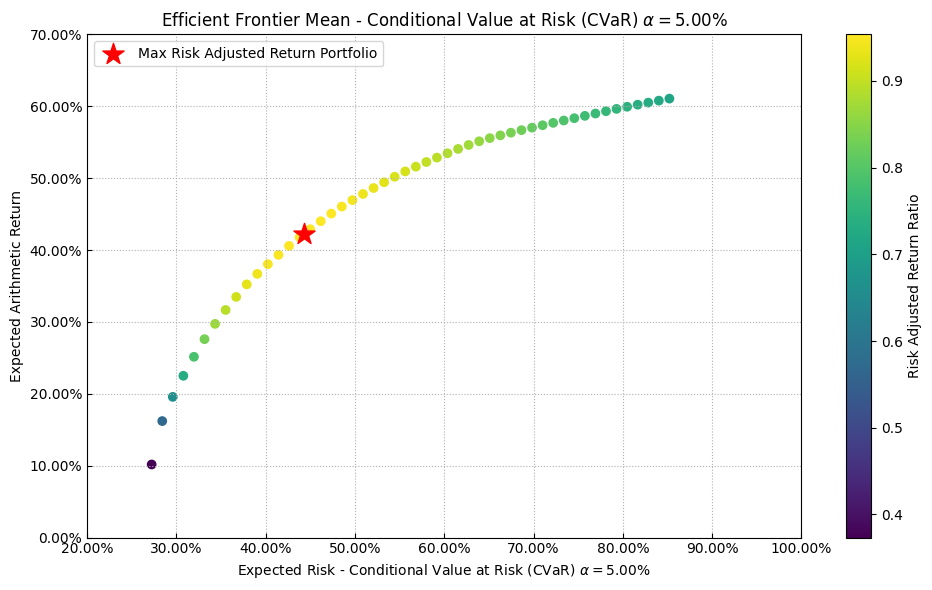

In [11]:
label = 'Max Risk Adjusted Return Portfolio' # Title of point

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

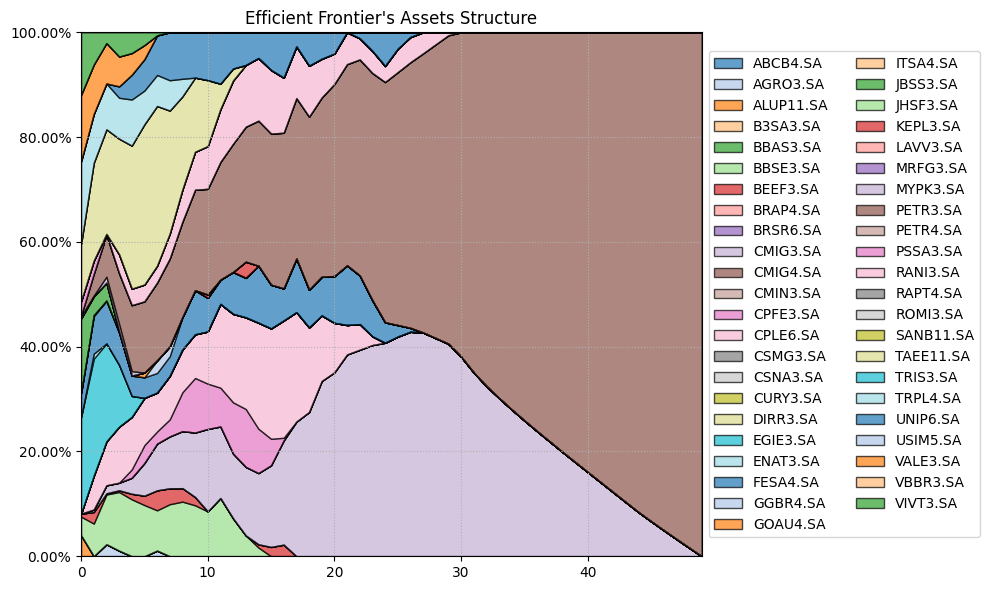

In [12]:
# Plotting efficient frontier composition

ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

### Calculate Optimal Portfolios for Several Risk Measures

In [13]:
# Risk Measures available:
#
# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'WR': Worst Realization (Minimax)
# 'MDD': Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded cumulative returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.

rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR',
       'EVaR', 'WR', 'MDD', 'ADD', 'CDaR', 'UCI', 'EDaR']

w_s = pd.DataFrame([])

for i in rms:
    w = port.optimization(model=model, rm=i, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms

In [16]:
%pip install Jinja2 -q

Note: you may need to restart the kernel to use updated packages.


In [17]:
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,MV,MAD,MSV,FLPM,SLPM,CVaR,EVaR,WR,MDD,ADD,CDaR,UCI,EDaR
ABCB4.SA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
AGRO3.SA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
ALUP11.SA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
B3SA3.SA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
BBAS3.SA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
BBSE3.SA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,12.24%,8.58%,8.33%,5.55%,13.15%
BEEF3.SA,3.03%,1.29%,1.75%,1.44%,1.80%,1.35%,2.77%,3.71%,0.00%,0.33%,0.00%,0.00%,0.00%
BRAP4.SA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
BRSR6.SA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
CMIG3.SA,20.52%,17.86%,20.37%,16.77%,20.49%,14.02%,20.82%,13.59%,35.07%,6.89%,27.95%,14.95%,26.84%


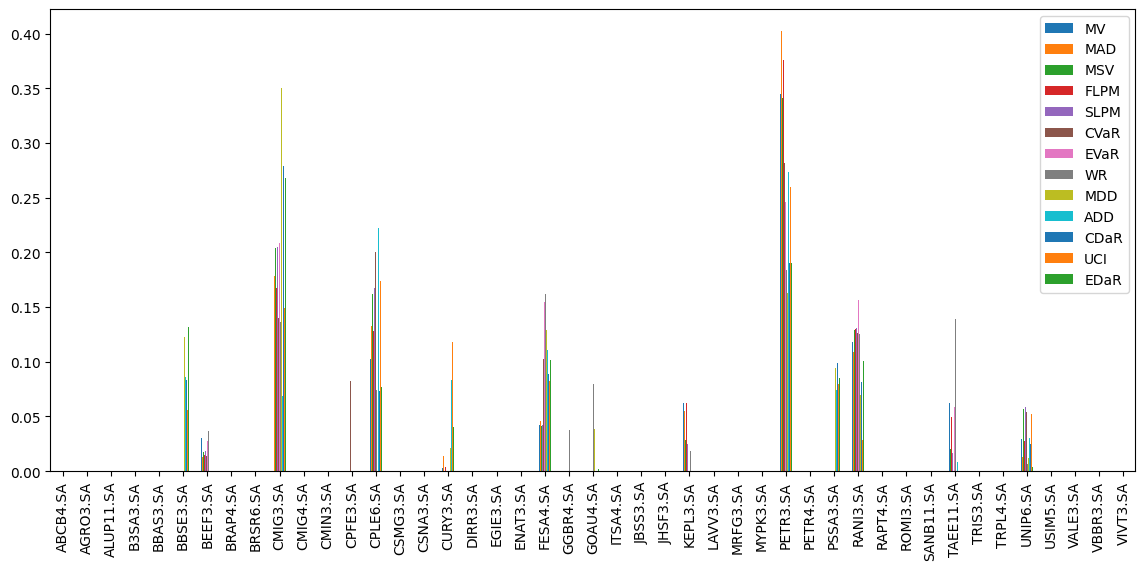

In [18]:
import matplotlib.pyplot as plt

# Plotting a comparison of assets weights for each portfolio

fig = plt.gcf()
fig.set_figwidth(14)
fig.set_figheight(6)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot.bar(ax=ax);